In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas

def psrecord2df(path):
    data = open(path).read().splitlines()[1:]
    data = [[float(c) for c in l.split()] for l in data]
    return pandas.DataFrame(
        data=data,
        columns=['times', 'cpu', 'mem_real', 'mem_virtual'])

In [31]:
v1 = psrecord2df("data/v1.txt")
v1["version"] = "v1"

v2 = psrecord2df("data/v2.txt")
v2["version"] = "v2"

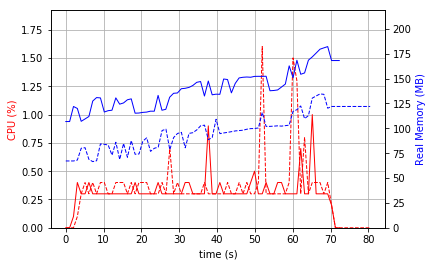

In [36]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.plot(v1['times'], v1['cpu'], '-', lw=1, color='r', linestyle="--")
ax.plot(v2['times'], v2['cpu'], '-', lw=1, color='r')

ax.set_ylabel('CPU (%)', color='r')
ax.set_xlabel('time (s)')
ax.set_ylim(0., max(v1['cpu']) * 1.2)

ax2 = ax.twinx()
ax2.set_ylim(0., max(v2['mem_real']) * 1.2)
ax2.set_ylabel('Real Memory (MB)', color='b')

ax2.plot(v1["times"], v1["mem_real"], '--', lw=1, color='b')
ax2.plot(v2['times'], v2['mem_real'], '-', lw=1, color='b')

ax.grid()